# Assignment 1
## Primitive Sensitivity Analysis
### Group D
### Autors: Aleksandar Ivanov, Florian Bernhard, Simon Schroeppel

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Default values of model parameters:

In [2]:
BETA = 14/9
ALPHA = 7/3
GAMMA = 7/9
I_0 = 1000
N = 80000000
WEEKS = 60

### Part 1: SEIR model

ODE of the SEIR-model

In [3]:
def seir_ode(t, y, b, a, g, n):
    S, E, I, R = y
    beta, alpha, gamma = b, a, g
    
    dSdt = -beta * S * I / n
    dEdt = beta * S * I / n - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt = gamma * I

    return [dSdt, dEdt, dIdt, dRdt]


Solve the SEIR ODE system with given parameters (*beta, alpha, gamma, i0*) for a given population size *n* for *weeks* weeks. Compute one solution for every week.

In [4]:
def integrate(params, n, weeks):
    b, a, g, i0 = params
    S0 = n - i0
    E0 = 0
    I0 = i0
    R0 = 0
    
    return solve_ivp(fun=seir_ode, t_span=[0, weeks], y0=[S0, E0, I0, R0], t_eval=range(weeks), args=(b, a, g, n))

In [5]:
def plot_seir(params, n, weeks):
    solution = integrate(params, n, weeks)
    S, E, I, R = solution.y
    t = solution.t

    plt.figure()

    plt.title(f"SEIR ODE Model: beta={params[0]:.3f}, alpha={params[1]:.3f}, gamma={params[2]:.3f}, I0={params[3]}, N={n}")
    plt.xlabel("Time in weeks")
    plt.ylabel("# of People")

    plt.plot(t, S, label='S (susceptible)')
    plt.plot(t, E, label='E (exposed)')
    plt.plot(t, I, label='I (infectious)')
    plt.plot(t, R, label='R (recovered)')
    
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    plt.legend(loc="best")

Plot the result of the integrated SEIR model with given default parameters

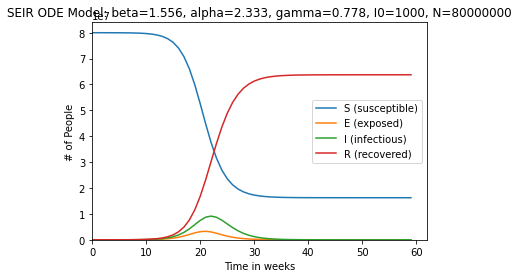

In [6]:
plot_seir(params=(BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)

Higher Number of initial cases leads to an earlier and higher peak of infectious people

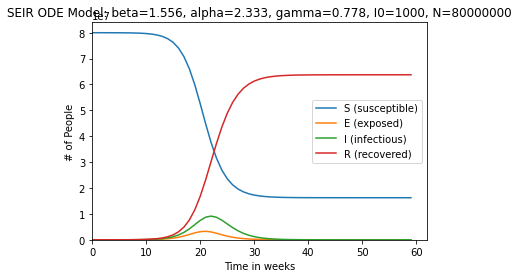

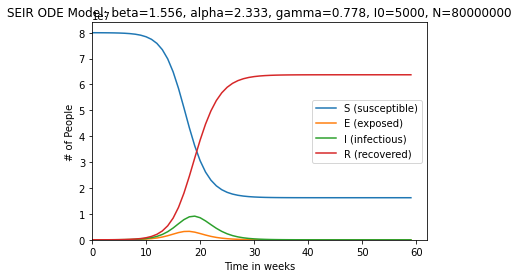

In [7]:
plot_seir(params=(BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(BETA, ALPHA, GAMMA, 5 * I_0), n=N, weeks=WEEKS)

Higher transmission rate also leads to an earlier peak in infections. Additionaly the total number of people who get the disease is higher. Doubling this parameter changes the curves far more dramatically than multiplying the number of inital cases by 5. This leads to the conclusion that the model is far more sensitive to changes in Beta than changes in I0. By comparing the third plot with the previous plots of 5I_0 one can see that a 20% increase in Beta approximately has the same effect as increasing number of inital cases 5 times. 

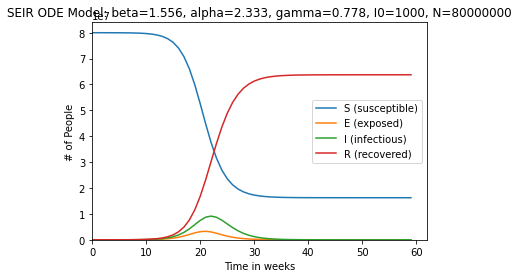

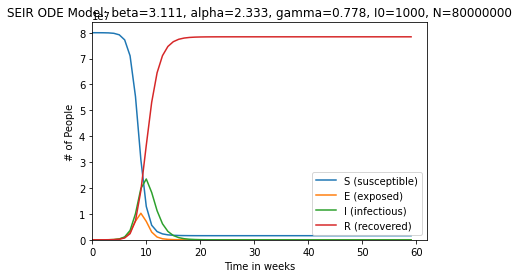

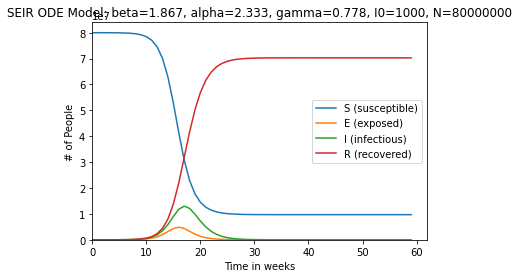

In [8]:
plot_seir(params=(BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(2 * BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(1.2 * BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)

An increase in the latency rate(i.e. reduction of the time period from getting the disease til being infectious to others) leads to a higher peak number of infections without really changing the total number of people who will get infected. Like the number of inital cases this parameter can easily increased 5 times without really affecting the overall dynamic of the disease.

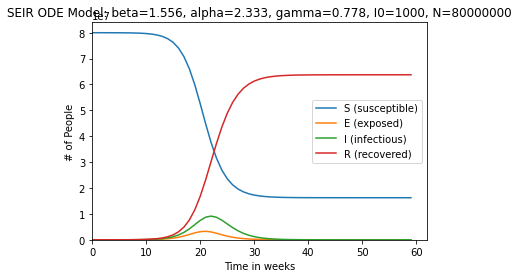

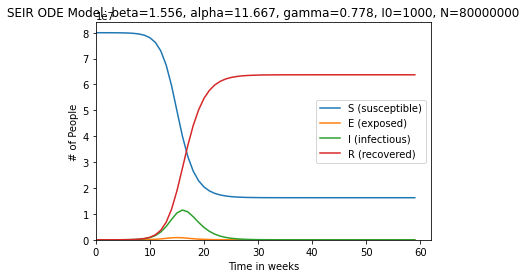

In [9]:
plot_seir(params=(BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(BETA, 5*ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)

An increase in the recovery rate(i.e. reduction of the time period from beeing infectious til being recovered) leads to a sharp decrease in the total number of recovered (i.e. people who got once infected) people.
While increasing the value of the parameters Alpha and I0 changes the curves just a little bit (the overall picture looks more or less similar) a relatively small change of 20% changes the overall picture quite drastically. As a comparison between plot 2 and 3 shows, the model is reacting nearly as sensitive to changes in the recovery rate as it did to changes in the transmission rate.
When the recovery rate is doubled there are only few people left who actually get the disease and the number of exposed or infectious people is hardly visible anymore.

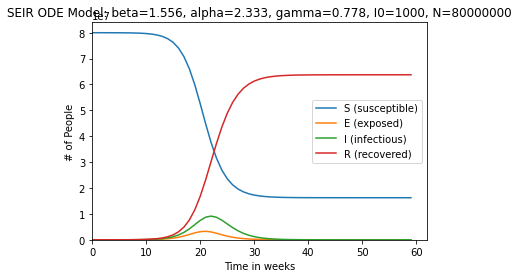

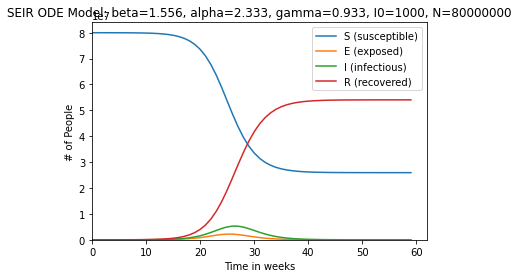

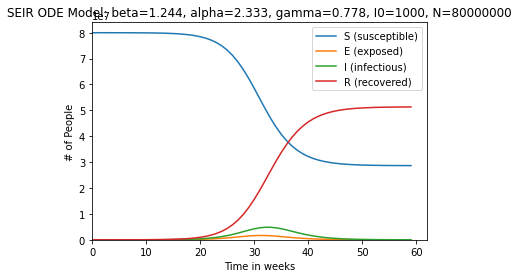

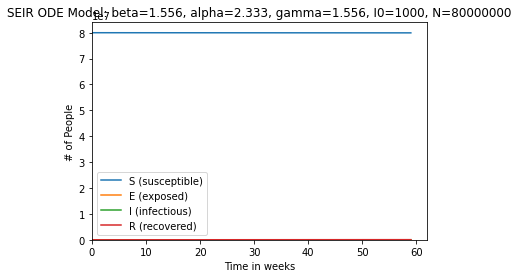

In [10]:
plot_seir(params=(BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(BETA, ALPHA, 1.2 * GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(0.8 * BETA, ALPHA, GAMMA, I_0), n=N, weeks=WEEKS)
plot_seir(params=(BETA, ALPHA, 2 * GAMMA, I_0), n=N, weeks=WEEKS)

Conclusion:
    From playing around with the parameters the transmission rate and the recovery rate are the parameters to whom the model is most sensitive to.

### Part 2: SEIRC-Model

In [11]:
def seirc_ode(t, y, b, a, g, n):
    S, E, I, R, C = y
    beta, alpha, gamma = b, a, g
    
    dSdt = -beta * S * I / n
    dEdt = beta * S * I / n - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt = gamma * I
    dCdt = alpha * E

    return [dSdt, dEdt, dIdt, dRdt, dCdt]

In [12]:
def integrate_seirc(params, n, weeks):
    b, a, g, i0 = params
    S0 = n - i0
    E0 = 0
    I0 = i0
    R0 = 0
    C0 = E0 + I0 + R0
    
    return solve_ivp(fun=seirc_ode, t_span=[0,weeks], y0=[S0, E0, I0, R0, C0], t_eval=range(weeks), args=(b, a, g, n))

In [13]:
def plot_seirc(params, n, weeks):
    solution = integrate_seirc(params, n, weeks)
    S, E, I, R, C = solution.y
    t = solution.t
    
    plt.figure(figsize=(8,8))

    plt.title(f"SEIR ODE Model: beta={params[0]:.3f}, alpha={params[1]:.3f}, gamma={params[2]:.3f}, I0={params[3]}, N={n}")
    plt.xlabel("Time in weeks")
    plt.ylabel("# of People")

    plt.plot(t, S, label='S (susceptible)', alpha=0.7)
    plt.plot(t, E, label='E (exposed)', alpha=0.7)
    plt.plot(t, I, label='I (infectious)', alpha=0.7)
    plt.plot(t, R, label='R (recovered)', alpha=0.7)
    plt.plot(t, C, label='C (cummulative cases)', linewidth=3)
    
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    plt.legend(loc="best")
    
    print(f'Number of cummulative cases after {weeks} weeks is: C({weeks})={C[-1]:.3f}\n')


Number of cummulative cases after 60 weeks is: C(60)=63745303.567



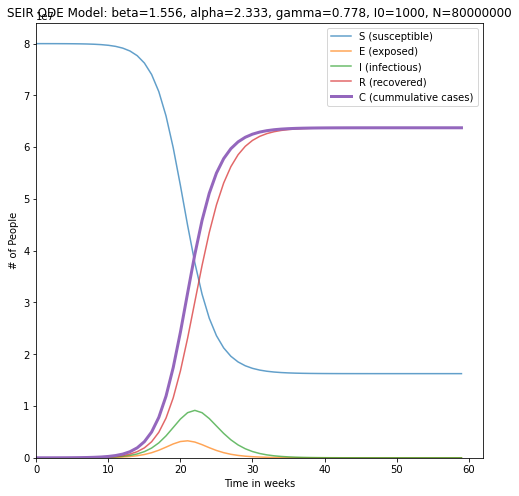

In [14]:
plot_seirc(params=[BETA, ALPHA, GAMMA, I_0], n=N, weeks=WEEKS)

### Sample parameter values within hypercube

In [15]:
# H = [1-p * beta, 1+p *beta]x[1-p * alpha, 1+p *alpha]x[1-p * gamma, 1+p *gamma]x[1-p * i0, 1+p *i0]

sample 1000 values for each param in the [param-p, param+p] range

In [16]:
def sample(beta, alpha, gamma, i0, sample_size, p):
    rng = np.random.default_rng()
    samples_beta = rng.uniform(low=(1-p)*beta, high=(1+p)*beta, size=sample_size)
    samples_alpha = rng.uniform(low=(1-p)*alpha, high=(1+p)*alpha, size=sample_size)
    samples_gamma = rng.uniform(low=(1-p)*gamma, high=(1+p)*gamma, size=sample_size)
    samples_i0 = rng.uniform(low=(1-p)*i0, high=(1+p)*i0, size=sample_size)
    
    samples = [[samples_beta[i], samples_alpha[i], samples_gamma[i], samples_i0[i]] for i in range(sample_size)]
    return samples


In [17]:
param_samples5 = sample(BETA, ALPHA, GAMMA, I_0, 1000, 0.05)
param_samples10 = sample(BETA, ALPHA, GAMMA, I_0, 1000, 0.1)

In [18]:
solutions5 = [integrate_seirc(param_samples5[i], N, WEEKS).y for i in range(len(param_samples5))]
solutions10 = [integrate_seirc(param_samples10[i], N, WEEKS).y for i in range(len(param_samples10))]


np.save('solutions_5.npy', solutions5)
np.save('solutions_10.npy', solutions10)

### Sensitivity analysis for cumulative cases

In [19]:
def cumulative_cases(p):
    if (p != 5 and p != 10):
        raise Exception(f"There are no samples for a perturbation of {p}%") 
    solutions = np.load(f'solutions_{p}.npy')    
    cumulative_c = [solutions[i][4] for i in range(len(solutions))]  
    quantile_2_5 = np.quantile(cumulative_c, 0.025, axis=0)
    quantile_97_5 = np.quantile(cumulative_c, 0.975, axis=0)
    median = np.quantile(cumulative_c, 0.5, axis=0)
    mean = np.mean(cumulative_c, axis=0)

    return quantile_2_5, quantile_97_5, median, mean

In [20]:
def plot_cumulative_cases_dist():
    
    fig, (ax5, ax10) = plt.subplots(2, 1, sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(10)

    quantile_2_5, quantile_97_5, median, mean = cumulative_cases(5)
    quantile_2_5_10, quantile_97_5_10, median_10, mean_10 = cumulative_cases(10)
    
    t = range(60)
    
    
    ax5.set_title(f"Distribution of Cummulative Cases with 5% perturbation of model parameters")
    ax10.set_title(f"Distribution of Cummulative Cases with 10% perturbation of model parameters")
    ax10.set_xlabel("Time in weeks")
    ax5.set_ylabel("# of People")
    ax10.set_ylabel("# of People")

    ax5.plot(t, median, label='Median')
    ax5.plot(t, mean, label='Mean')
    ax5.fill_between(t, quantile_2_5, quantile_97_5, label='[q0.025,q0975]', alpha=0.4)
    

    ax10.plot(t, median_10, label='Median')
    ax10.plot(t, mean_10, label='Mean')
    ax10.fill_between(t, quantile_2_5_10, quantile_97_5_10, label='[q0.025,q0975]', alpha=0.4)
        
    
    plt.ylim(bottom=0)
    plt.xlim(left=0)

    plt.legend(loc="best")

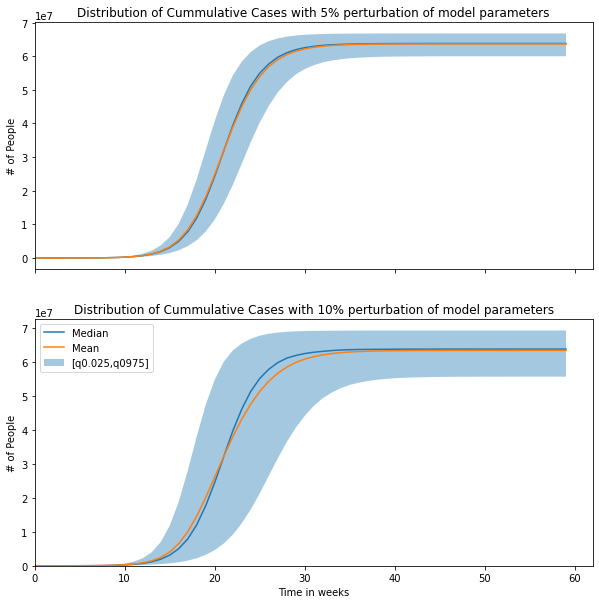

In [21]:
plot_cumulative_cases_dist()

In [22]:
def final_cumulative_cases(p):
    if (p != 5 and p != 10):
        raise Exception(f"There are no samples for a perturbation of {p}%")    
    solutions = np.load(f'solutions_{p}.npy')
    final_cumulative_c = [solutions[i][4][-1] for i in range(len(solutions))]
    quantile_2_5 = np.quantile(final_cumulative_c, 0.025)
    quantile_97_5 = np.quantile(final_cumulative_c, 0.975)
    
    return final_cumulative_c, quantile_2_5, quantile_97_5

In [23]:
def plot_final_cumulative_cases_distribution(p):

    final_cumulative_c, quantile_2_5, quantile_97_5 = final_cumulative_cases(p)
    
    sns.set()
    sns.set_style('whitegrid')
    sns.displot(final_cumulative_c, kde=True, stat='probability')
    plt.axvline(quantile_2_5, linewidth=3, color='g', label='q_0.025')
    plt.axvline(quantile_97_5, linewidth=3, color='r', label='q_0.975')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    print(f'The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [{quantile_2_5:.2f} , {quantile_97_5:.2f}]')

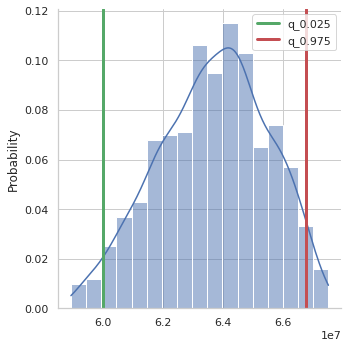

The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [59971329.62 , 66753086.73]


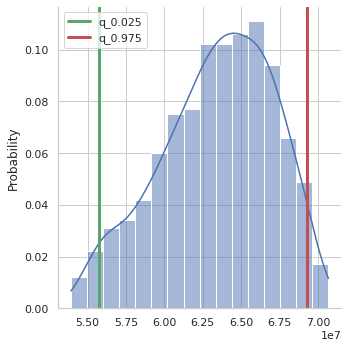

The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [55720590.16 , 69315081.79]


In [24]:
plot_final_cumulative_cases_distribution(5)
plot_final_cumulative_cases_distribution(10)

### Sensitivity analysis of max I(t)

In [25]:
def peak_infections(p):
    if (p != 5 and p != 10):
        raise Exception(f"There are no samples for a perturbation of {p}%")
    solutions = np.load(f'solutions_{p}.npy')
    infections = [solutions[i][2] for i in range(len(solutions))]
    peak_inf = np.argmax(infections, axis=1)
    quantile_2_5 = np.quantile(peak_inf, 0.025)
    quantile_97_5 = np.quantile(peak_inf, 0.975)
    
    return peak_inf, quantile_2_5, quantile_97_5
        

In [26]:
def plot_max_infections_distribution(p):
    
    peak_inf, quantile_2_5, quantile_97_5 = peak_infections(p)
    
    sns.set()
    sns.set_style('whitegrid')
    sns.displot(peak_inf, kde=False, stat='probability')
    plt.axvline(quantile_2_5, linewidth=3, color='g', label='q_0.025')
    plt.axvline(quantile_97_5, linewidth=3, color='r', label='q_0.975')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    print(f'The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [{quantile_2_5:.2f} , {quantile_97_5:.2f}]')

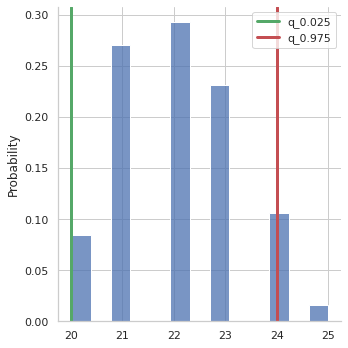

The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [20.00 , 24.00]


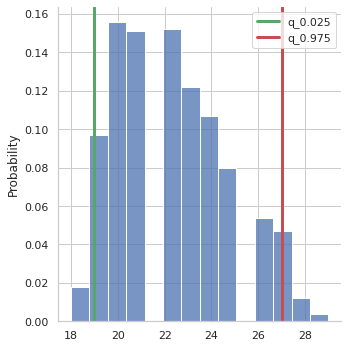

The empirical 95% quantile interval for the number of cumulative cases after 60 weeks is [19.00 , 27.00]


In [27]:
plot_max_infections_distribution(5)
plot_max_infections_distribution(10)